In [330]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import statsmodels.formula.api as smf

# Get the data
data = pd.read_csv('auto-mpg.csv')
print(data.dtypes)
data.head()

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


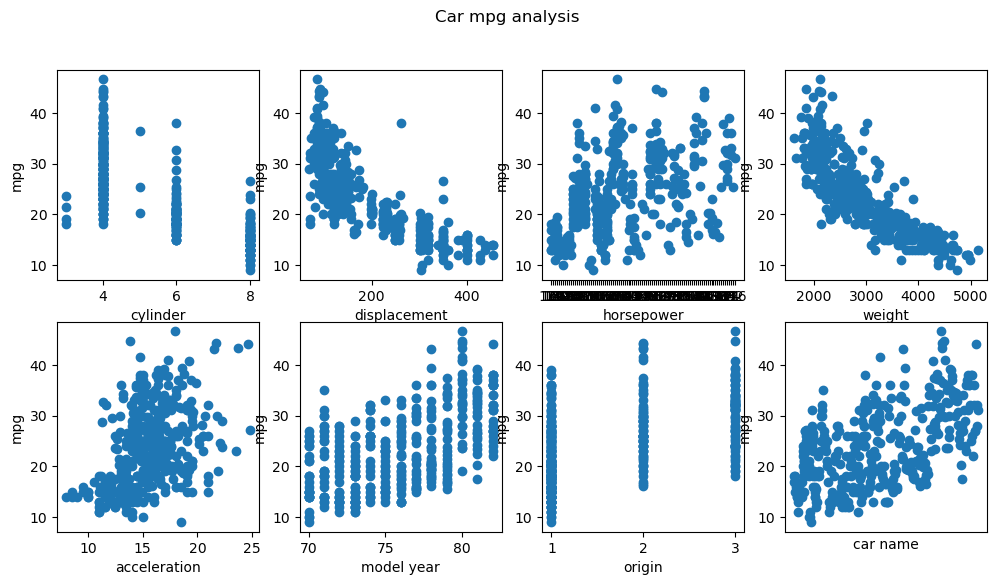

In [331]:
def plot_everything(y_vals, normed=False): # Create plots of param vs. each variable
    if normed:
        normed = '_normed'
    else:
        normed = ''
    fig, ax = plt.subplots(2, 4, figsize=(12,6))
    fig.suptitle("Car mpg analysis")
    for y_val in y_vals:
        ax[0][0].plot(data['cylinders{}'.format(normed)], y_val, 'o', label = "Data")           # scatter plot showing actual data
        ax[0][0].set_xlabel('cylinder{}'.format(normed))
        ax[0][0].set_ylabel('mpg')
        
        ax[0][1].plot(data['displacement{}'.format(normed)], y_val, 'o', label = "Data")           # scatter plot showing actual data
        ax[0][1].set_xlabel('displacement{}'.format(normed))
        ax[0][1].set_ylabel('mpg')
        
        ax[0][2].plot(data['horsepower{}'.format(normed)], y_val, 'o', label = "Data")           # scatter plot showing actual data
        ax[0][2].set_xlabel('horsepower{}'.format(normed))
        ax[0][2].set_ylabel('mpg')
        
        ax[0][3].plot(data['weight{}'.format(normed)], y_val, 'o', label = "Data")           # scatter plot showing actual data
        ax[0][3].set_xlabel('weight{}'.format(normed))
        ax[0][3].set_ylabel('mpg')
        
        ax[1][0].plot(data['acceleration{}'.format(normed)], y_val, 'o', label = "Data")           # scatter plot showing actual data
        ax[1][0].set_xlabel('acceleration{}'.format(normed))
        ax[1][0].set_ylabel('mpg')
        
        ax[1][1].plot(data['model year{}'.format(normed)], y_val, 'o', label = "Data")           # scatter plot showing actual data
        ax[1][1].set_xlabel('model year{}'.format(normed))
        ax[1][1].set_ylabel('mpg')
    
        ax[1][2].plot(data['origin{}'.format(normed)], y_val, 'o', label = "Data")           # scatter plot showing actual data
        ax[1][2].set_xlabel('origin{}'.format(normed))
        ax[1][2].set_ylabel('mpg')
    
    ax[1][3].plot(data['car name'], y_val, 'o', label = "Data")           # scatter plot showing actual data
    ax[1][3].set_xlabel('car name')
    ax[1][3].set_ylabel('mpg')
    ax[1][3].set_xticks([])
    
plot_everything([data['mpg']])

We see that the horsepower column is non-numerical so we will convert it and also normalize every column

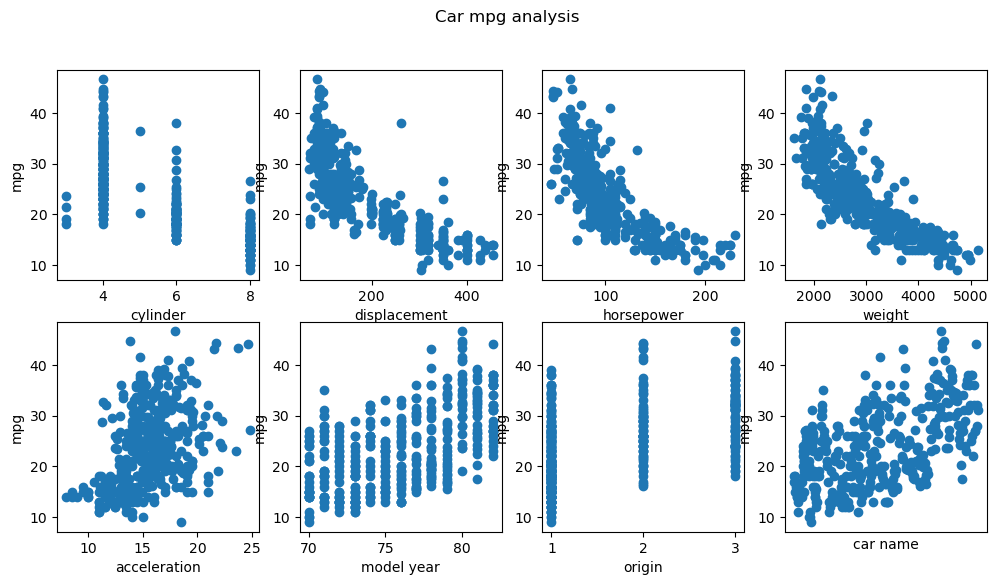

In [332]:
for col in data.columns:
    if col != 'car name':
        data[col] = pd.to_numeric(data[col], errors ='coerce')
#replacing missing values in horsepower with its median
horse_mean = data['horsepower'].mean()
data['horsepower'] = data['horsepower'].fillna(horse_mean)

plot_everything([data['mpg']])

In [333]:
for col in data.columns:
    if col != 'car name':
        data[f'{col}_normed'] = (data[col] - data[col].mean()) / data[col].std()
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg_normed,cylinders_normed,displacement_normed,horsepower_normed,weight_normed,acceleration_normed,model year_normed,origin_normed
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,-0.705551,1.496308,1.089233,0.668355,0.630077,-1.293870,-1.625381,-0.714246
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,-1.089379,1.496308,1.501624,1.584605,0.853259,-1.475181,-1.625381,-0.714246
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,-0.705551,1.496308,1.194728,1.191926,0.549778,-1.656492,-1.625381,-0.714246
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,-0.961437,1.496308,1.060461,1.191926,0.546236,-1.293870,-1.625381,-0.714246
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,-0.833494,1.496308,1.041280,0.930141,0.565130,-1.837804,-1.625381,-0.714246


In [334]:
import statsmodels.formula.api as smf

model = smf.ols('mpg ~ cylinders_normed + displacement_normed + horsepower_normed + weight_normed + acceleration_normed + Q("model year_normed") + origin_normed', data=data)
model = model.fit()

# Predict values
data['mpg_full_lin_pred'] = model.predict()
data['mpg_pred_resid'] = data['mpg'] - data['mpg_full_lin_pred']

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.4
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          2.25e-141
Time:                        12:57:43   Log-Likelihood:                -1040.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     390   BIC:                             2129.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 23

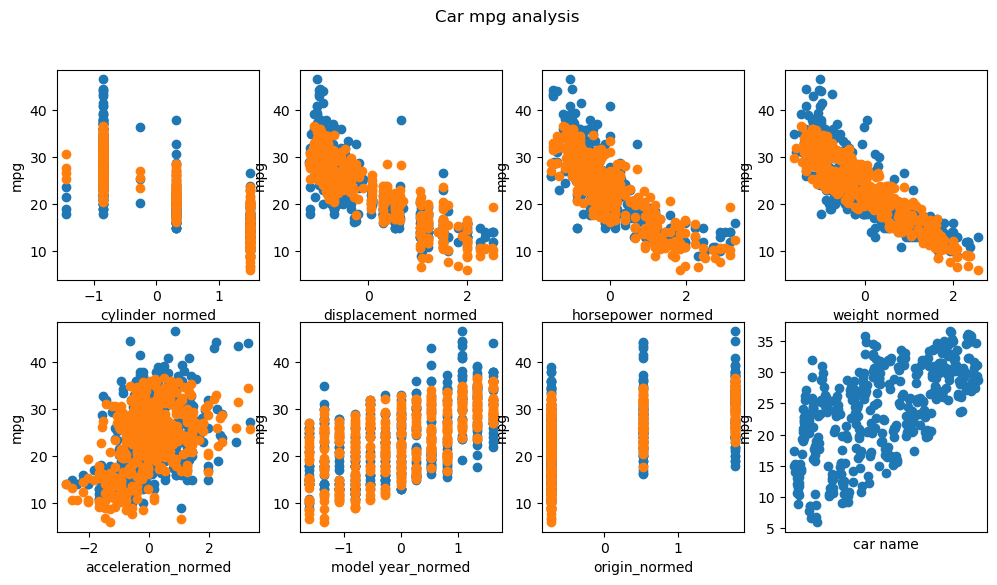

In [335]:
plot_everything([data['mpg'], data['mpg_full_lin_pred']], True)

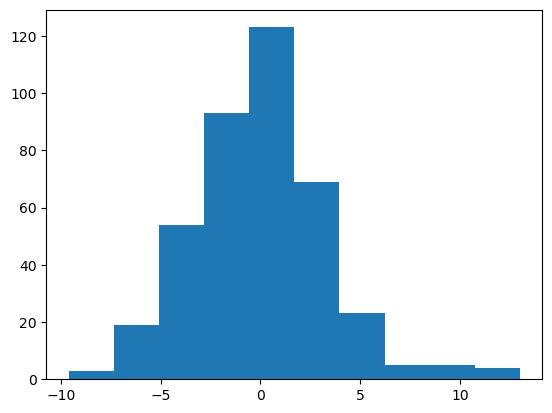

In [336]:
hist_object = plt.hist(data['mpg_pred_resid'])

In [337]:
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev)**2 / 2)

In [338]:
def fit_hist_w_gauss(hist, b=15):
    bin_width = hist[1][1] - hist[1][0]
    bin_centers = [bin_left + bin_width / 2 for bin_left in hist[1]][:-1]
    popt, _ = curve_fit(gaussian, bin_centers, hist[0], p0=[1, np.mean(bin_centers), np.std(bin_centers)])
    plt.hist(bin_centers, bins=hist[1], weights=hist[0], alpha=0.5, label='Histogram')
    plt.plot(np.linspace(-b, b, 1000), gaussian(np.linspace(-b, b, 1000), *popt), label='Fit')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    print(f'Amplitude: {popt[0]}    Mean: {popt[1]}    Std: {popt[2]}')

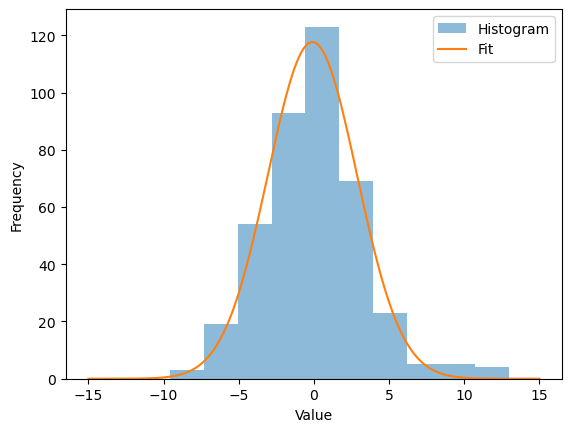

Amplitude: 117.65444463066625    Mean: -0.09851146108835948    Std: -2.9630295690118094


In [339]:
fit_hist_w_gauss(hist_object)

In [340]:
model = smf.ols('mpg ~ displacement_normed + weight_normed + Q("model year_normed") + origin_normed', data=data)
model = model.fit()

data['mpg_sig_pred'] = model.predict()
data['mpg_pred_resid1'] = data['mpg'] - data['mpg_sig_pred']

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     442.2
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          5.29e-144
Time:                        12:57:44   Log-Likelihood:                -1043.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     393   BIC:                             2117.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 23

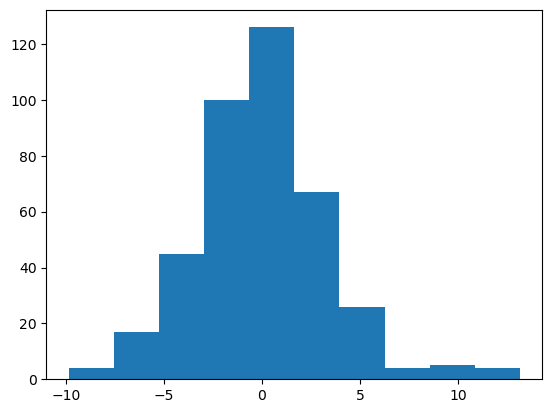

In [341]:
hist_object = plt.hist(data['mpg_pred_resid1'])

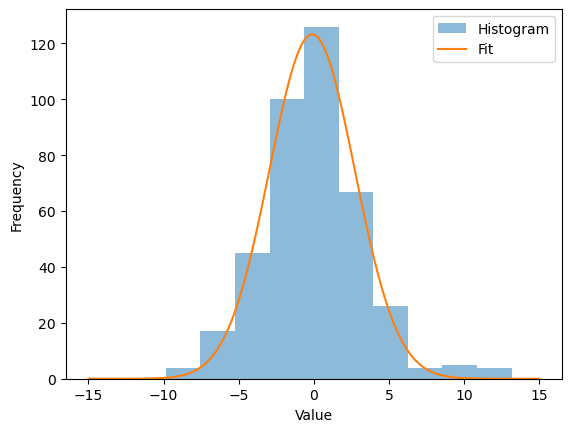

Amplitude: 123.25800461019351    Mean: -0.118074233711191    Std: -2.8398894631668234


In [342]:
fit_hist_w_gauss(hist_object)

Now lets write a quick function to give me all of the interaction terms so I do not have to type them all out

In [343]:
atts = ['cylinders_normed', 'displacement_normed', 'horsepower_normed', 'weight_normed', 'acceleration_normed', 'Q("model year_normed")', 'origin_normed']
s = ''
for i in range(len(atts) - 1):
    for j in range(1, len(atts) - i):
        s += f'+ {atts[i]} * {atts[i + j]} '
s

'+ cylinders_normed * displacement_normed + cylinders_normed * horsepower_normed + cylinders_normed * weight_normed + cylinders_normed * acceleration_normed + cylinders_normed * Q("model year_normed") + cylinders_normed * origin_normed + displacement_normed * horsepower_normed + displacement_normed * weight_normed + displacement_normed * acceleration_normed + displacement_normed * Q("model year_normed") + displacement_normed * origin_normed + horsepower_normed * weight_normed + horsepower_normed * acceleration_normed + horsepower_normed * Q("model year_normed") + horsepower_normed * origin_normed + weight_normed * acceleration_normed + weight_normed * Q("model year_normed") + weight_normed * origin_normed + acceleration_normed * Q("model year_normed") + acceleration_normed * origin_normed + Q("model year_normed") * origin_normed '

In [344]:
model = smf.ols('mpg ~ cylinders_normed + displacement_normed + horsepower_normed + weight_normed + acceleration_normed + Q("model year_normed") + origin_normed + cylinders_normed * displacement_normed + cylinders_normed * horsepower_normed + cylinders_normed * weight_normed + cylinders_normed * acceleration_normed + cylinders_normed * Q("model year_normed") + cylinders_normed * origin_normed + displacement_normed * horsepower_normed + displacement_normed * weight_normed + displacement_normed * acceleration_normed + displacement_normed * Q("model year_normed") + displacement_normed * origin_normed + horsepower_normed * weight_normed + horsepower_normed * acceleration_normed + horsepower_normed * Q("model year_normed") + horsepower_normed * origin_normed + weight_normed * acceleration_normed + weight_normed * Q("model year_normed") + weight_normed * origin_normed + acceleration_normed * Q("model year_normed") + acceleration_normed * origin_normed + Q("model year_normed") * origin_normed', data=data)
model = model.fit()

data['mpg_full_int_pred'] = model.predict()
data['mpg_pred_resid2'] = data['mpg'] - data['mpg_full_int_pred']

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     105.3
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.64e-157
Time:                        12:57:44   Log-Likelihood:                -945.50
No. Observations:                 398   AIC:                             1949.
Df Residuals:                     369   BIC:                             2065.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

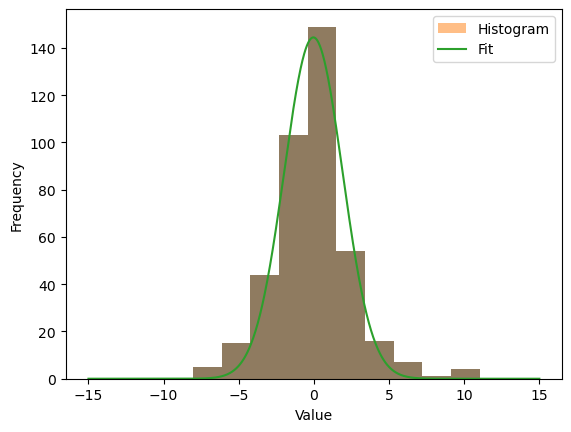

Amplitude: 144.48708390394773    Mean: -0.03573953564472648    Std: -1.9409138910489416


In [345]:
hist_object = plt.hist(data['mpg_pred_resid2'])
fit_hist_w_gauss(hist_object)

A substantial amount of the interaction terms are actually statistically significant!

In [346]:
model = smf.ols('mpg ~ horsepower_normed + weight_normed + Q("model year_normed") + origin_normed + displacement_normed * weight_normed + displacement_normed * Q("model year_normed") + acceleration_normed * Q("model year_normed") + acceleration_normed * origin_normed + Q("model year_normed") * origin_normed', data=data)
model = model.fit()

data['mpg_int_pred'] = model.predict()
data['mpg_pred_resid3'] = data['mpg'] - data['mpg_int_pred']

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     252.6
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          9.87e-169
Time:                        12:57:44   Log-Likelihood:                -963.92
No. Observations:                 398   AIC:                             1952.
Df Residuals:                     386   BIC:                             2000.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

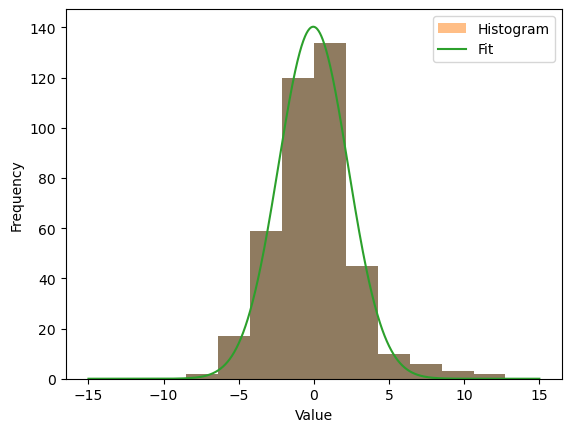

Amplitude: 140.29598838234799    Mean: -0.043588550288916776    Std: -2.313288725406078


In [347]:
hist_object = plt.hist(data['mpg_pred_resid3'])
fit_hist_w_gauss(hist_object)

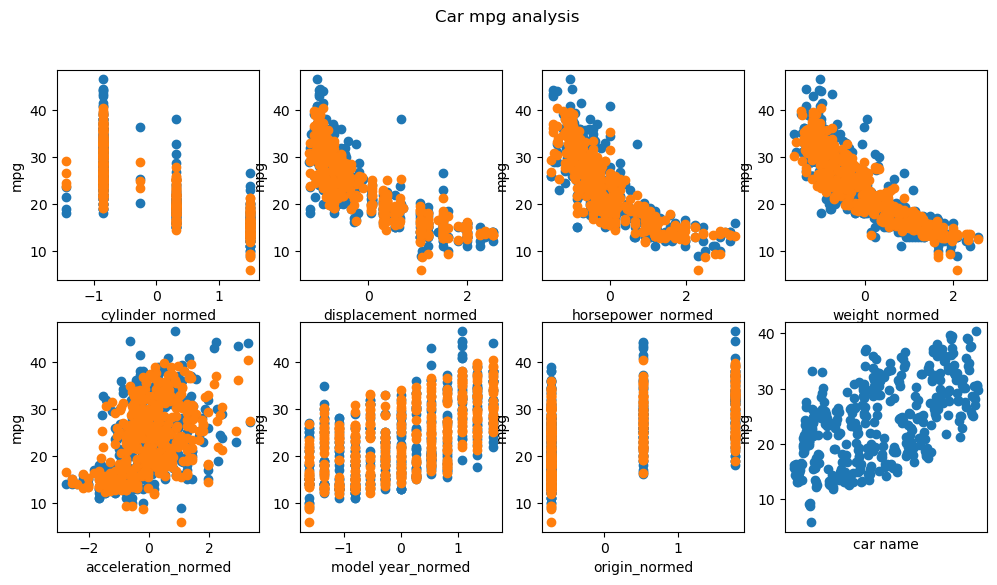

In [348]:
plot_everything([data['mpg'], data['mpg_int_pred']], True)

#### High Dimensional Plotting
I got distracted and wanted to try graphing the data with t-sne and 2 component PCA

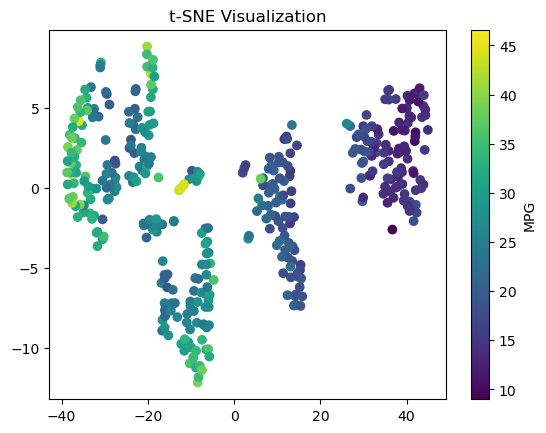

In [349]:
import sklearn.manifold

# Load the data
raw_data_normed = data[['cylinders_normed', 'displacement_normed', 'horsepower_normed', 'weight_normed', 'acceleration_normed', 'model year_normed', 'origin_normed']]

# Create the t-SNE model
tsne = sklearn.manifold.TSNE(n_components=2, perplexity=30, random_state=42)

# Fit the model to the data
tsne_model = tsne.fit(raw_data_normed)

# Get the embeddings
embeddings = tsne_model.embedding_

# Plot the embeddings
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=data['mpg'], cmap='viridis')
plt.title("t-SNE Visualization")
plt.colorbar(label='MPG')
plt.show()

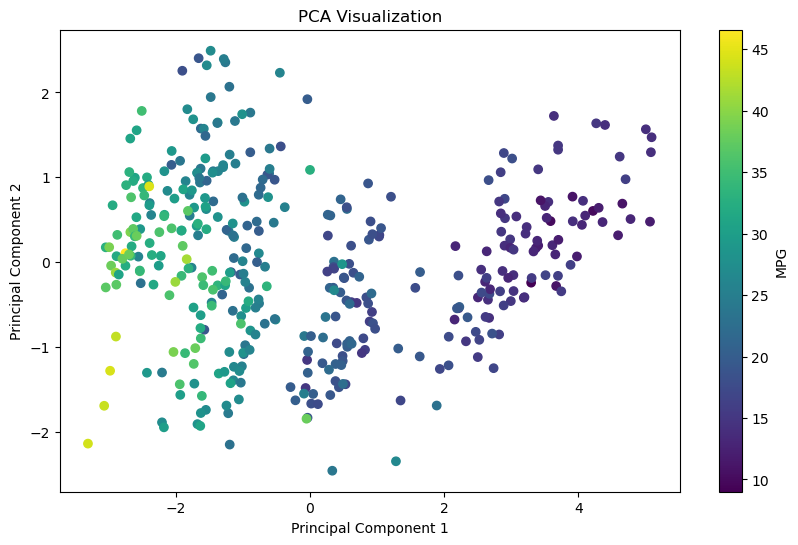

In [350]:
from sklearn.decomposition import PCA

# Create a PCA instance with the desired number of components
pca = PCA(n_components=2)  # You can adjust the number of components as needed

# Fit PCA to the scaled data
pca_result = pca.fit_transform(raw_data_normed)


pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])  # Adjust column names as needed

plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=data['mpg'], cmap='viridis')  # use mpg to color points on plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='MPG')
plt.show()

The x axis actually seems to predict the gas milage pretty well, so I will get the parameters and make a model out of it

In [351]:
print(raw_data_normed.columns)
pca.components_

Index(['cylinders_normed', 'displacement_normed', 'horsepower_normed',
       'weight_normed', 'acceleration_normed', 'model year_normed',
       'origin_normed'],
      dtype='object')


array([[ 0.43862683,  0.45396453,  0.43706212,  0.43230831, -0.29765673,
        -0.21479741, -0.2981132 ],
       [-0.11407739, -0.10535161,  0.13929117, -0.20307205, -0.48625222,
        -0.63524052,  0.5246669 ]])

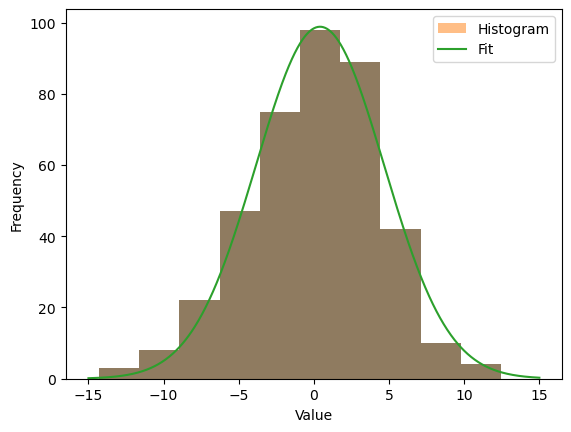

Amplitude: 98.8283238178993    Mean: 0.40772855838680183    Std: -4.26210234470332


In [352]:
pred = (raw_data_normed * -pca.components_[0]).sum(axis=1)
pred = (pred - pred.mean()) / pred.std()

hist_object = plt.hist((pred * data['mpg'].std() + data['mpg'].mean()) - data['mpg'])
fit_hist_w_gauss(hist_object)

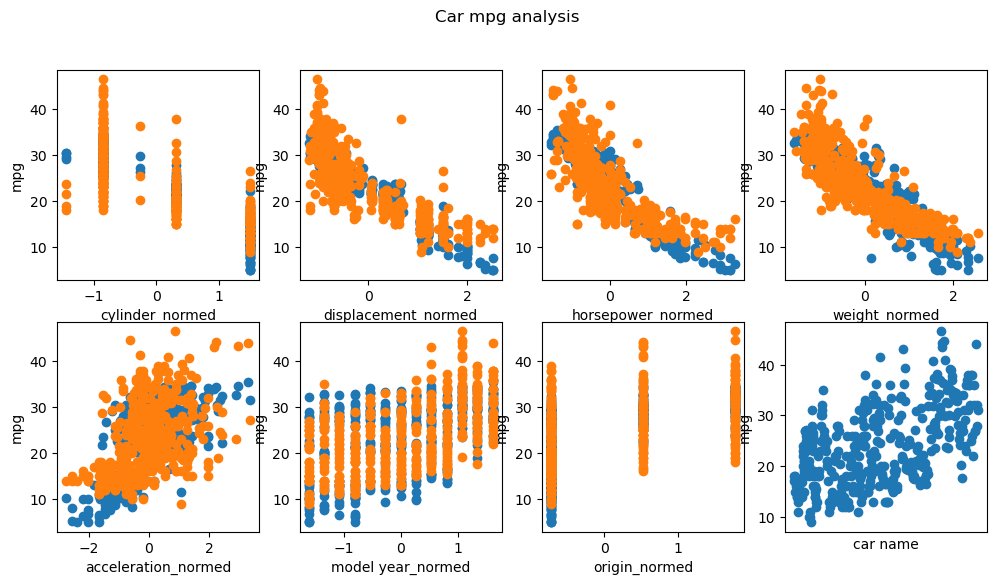

In [353]:
plot_everything([(pred * data['mpg'].std() + data['mpg'].mean()), data['mpg']], True)

Actually not bad